In [1]:
from pathlib import Path
import pandas as pd
from decord import VideoReader
import matplotlib.pyplot as plt

path = (
    "/mnt/upramdya/data/MD/Ballpushing_TNTScreen/Datasets/"
    "250805_15_standardized_contacts_TNT_screen_Data/standardized_contacts/"
    "231129_TNT_Fine_1_Videos_Tracked_standardized_contacts.feather"
)

fly = "231129_TNT_Fine_1_Videos_Tracked_arena6_corridor2"
event_id = 1233
df_event = pd.read_feather(path).query(f"fly == '{fly}' and event_id == {event_id}")
df_event

,index,frame,time,object,x_Head,y_Head,x_Thorax,y_Thorax,x_Abdomen,y_Abdomen,...,Brain region,Simplified Nickname,Split,Date,Genotype,Period,FeedingState,Orientation,Light,Crossing
1486250,77280,102164,3522.896552,fly_1,71.596687,103.664413,71.922966,115.675621,67.404640,135.791382,...,LH,LH180,y,231129,TNTxZ1897,PM14,starved_noWater,std,on,1
1486251,77281,102165,3522.931034,fly_1,68.381180,100.482437,72.234764,115.396919,67.996582,135.558472,...,LH,LH180,y,231129,TNTxZ1897,PM14,starved_noWater,std,on,1
1486252,77282,102166,3522.965517,fly_1,68.266685,99.757996,71.589699,111.743065,67.672844,131.897842,...,LH,LH180,y,231129,TNTxZ1897,PM14,starved_noWater,std,on,1
1486253,77283,102167,3523.000000,fly_1,68.177544,96.310425,68.442451,108.176048,67.789963,128.409546,...,LH,LH180,y,231129,TNTxZ1897,PM14,starved_noWater,std,on,1
1486254,77284,102168,3523.034483,fly_1,67.740990,95.549889,67.901932,104.468864,67.942940,127.626167,...,LH,LH180,y,231129,TNTxZ1897,PM14,starved_noWater,std,on,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486365,77395,102279,3526.862069,fly_1,63.956806,72.021362,64.016479,83.866333,59.801125,104.021957,...,LH,LH180,y,231129,TNTxZ1897,PM14,starved_noWater,std,on,1
1486366,77396,102280,3526.896552,fly_1,67.397415,72.372841,67.566383,84.233765,63.990658,104.456970,...,LH,LH180,y,231129,TNTxZ1897,PM14,starved_noWater,std,on,1
1486367,77397,102281,3526.931034,fly_1,68.177681,75.326660,72.132111,84.433372,71.796150,107.428215,...,LH,LH180,y,231129,TNTxZ1897,PM14,starved_noWater,std,on,1
1486368,77398,102282,3526.965517,fly_1,71.643196,71.952019,75.485687,83.907616,71.972237,103.915337,...,LH,LH180,y,231129,TNTxZ1897,PM14,starved_noWater,std,on,1


In [2]:
start_frame = df_event["frame"].min()
start_frame

np.int64(102164)

In [3]:
fly_dir = Path(df_event["flypath"].unique().item())
video_path = (fly_dir / f"{fly_dir.stem}_preprocessed.mp4").as_posix()
im = VideoReader(video_path)[start_frame].asnumpy()

In [4]:
edges = [
    ("Thorax", "Head"),
    ("Thorax", "Abdomen"),
    ("Thorax", "Lfront"),
    ("Thorax", "Lmid"),
    ("Thorax", "Lhind"),
    ("Thorax", "Rfront"),
    ("Thorax", "Rmid"),
    ("Thorax", "Rhind"),
]

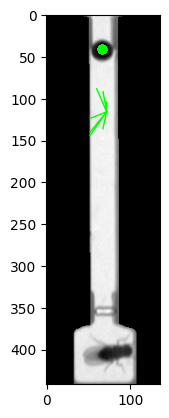

In [5]:
s = df_event.set_index("frame").loc[start_frame]
fig, ax = plt.subplots()
ax.imshow(im)
for src, dst in edges:
    ax.plot([s[f"x_{src}"], s[f"x_{dst}"]],
            [s[f"y_{src}"], s[f"y_{dst}"]],
            color="lime", linewidth=1)
    ax.scatter(s["x_centre_preprocessed"], s["y_centre_preprocessed"], color="lime")